## **Libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import requests
from tqdm import tqdm
import librosa

In [3]:
!pip install numpy==1.24.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is 

In [3]:
!pip install jams

  Using cached jams-0.3.4.tar.gz (51 kB)
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 7.7 MB/s eta 0:00:00
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64900 sha256=720f470b5d6a5ca38c0bdd8b384591a18c6a27caebf35c1ed1a7a1df5d63c631
  Stored in directory: /root/.cache/pip/wheels/3e/b9/4f/64010f7e4412ba5c6190fe04ce93487970f4ae967c952b1460
Successfully built jams


In [4]:
import jams
import pandas as pd
import numpy as np

In [5]:
import os

base_dir = '/content/drive/MyDrive/GuitarSet'
os.makedirs(base_dir, exist_ok=True)

In [6]:
files_info = {
    "annotation.zip": "annotation",
    "audio_hex-pickup_debleeded.zip": "audio/hex_pickup_debleeded",
    "audio_hex-pickup_original.zip": "audio/hex_pickup_original",
    "audio_mono-mic.zip": "audio/mono_mic",
    "audio_mono-pickup_mix.zip": "audio/mono_pickup_mix"
}

## **Data Inspection**

In [12]:
jams_dir = "/content/drive/MyDrive/Automatic Guitar Transcription/Data Set/GuitarSet/annotation"

for fname in sorted(os.listdir(jams_dir)):
    if fname.endswith(".jams"):
        jam_path = os.path.join(jams_dir, fname)
        jam = jams.load(jam_path)

for ann in jam.annotations:
    print(ann.namespace)

pitch_contour
note_midi
pitch_contour
note_midi
pitch_contour
note_midi
pitch_contour
note_midi
pitch_contour
note_midi
pitch_contour
note_midi
beat_position
tempo
chord
chord
key_mode


In [10]:
solo_path = "/content/drive/MyDrive/Automatic Guitar Transcription/Data Set/GuitarSet/annotation/00_BN1-129-Eb_solo.jams"
comp_path = "/content/drive/MyDrive/Automatic Guitar Transcription/Data Set/GuitarSet/annotation/00_BN1-129-Eb_comp.jams"

### **note_midi Distribution**

In [ ]:
jams_dir = "/content/drive/MyDrive/Automatic Guitar Transcription/Data Set/GuitarSet/annotation"

# Özet bilgileri saklamak için liste
summary_data = []

# Her .jams dosyasını analiz et
for fname in sorted(os.listdir(jams_dir)):
    if fname.endswith(".jams"):
        jam_path = os.path.join(jams_dir, fname)
        jam = jams.load(jam_path)

        # note_midi ve pitch_contour veri noktalarını ayıkla
        note_midi_values = []
        pitch_durations = []

        for ann in jam.annotations:
            if ann.namespace == "note_midi":
                for note in ann.data:
                    note_midi_values.append(note.value)
            elif ann.namespace == "pitch_contour":
                for pitch in ann.data:
                    pitch_durations.append(pitch.duration)

        # İstatistikleri hesapla
        note_count = len(note_midi_values)
        pitch_count = len(pitch_durations)
        midi_min = np.min(note_midi_values) if note_midi_values else None
        midi_max = np.max(note_midi_values) if note_midi_values else None
        pitch_avg_dur = np.mean(pitch_durations) if pitch_durations else None

        summary_data.append({
            "filename": fname,
            "note_count": note_count,
            "midi_min": round(midi_min, 2) if midi_min is not None else None,
            "midi_max": round(midi_max, 2) if midi_max is not None else None,
            "pitch_frame_count": pitch_count,
            "pitch_avg_duration": round(pitch_avg_dur, 4) if pitch_avg_dur is not None else None,
        })

# DataFrame olarak göster
summary_df = pd.DataFrame(summary_data)
summary_df.head(10)  # İlk 10 dosyayı önizle

,filename,note_count,midi_min,midi_max,pitch_frame_count,pitch_avg_duration
0,00_BN1-129-Eb_comp.jams,133,43.98,72.09,9706,0.0
1,00_BN1-129-Eb_solo.jams,71,46.00,72.12,5366,0.0
2,00_BN1-147-Gb_comp.jams,151,40.57,70.14,8541,0.0
3,00_BN1-147-Gb_solo.jams,89,39.87,54.19,3392,0.0
4,00_BN2-131-B_comp.jams,239,41.04,74.13,11034,0.0
5,00_BN2-131-B_solo.jams,97,58.10,80.98,4331,0.0
6,00_BN2-166-Ab_comp.jams,200,40.04,68.17,9026,0.0
7,00_BN2-166-Ab_solo.jams,87,49.14,76.01,3420,0.0
8,00_BN3-119-G_comp.jams,169,39.96,69.09,12854,0.0
9,00_BN3-119-G_solo.jams,79,42.08,69.07,11159,0.0


from matplotlib import pyplot as plt
_df_0['note_count'].plot(kind='hist', bins=20, title='note_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['midi_min'].plot(kind='hist', bins=20, title='midi_min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['midi_max'].plot(kind='hist', bins=20, title='midi_max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['pitch_frame_count'].plot(kind='hist', bins=20, title='pitch_frame_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='note_count', y='midi_min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='midi_min', y='midi_max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='midi_max', y='pitch_frame_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['pitch_avg_duration']
  ys = series['note_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('pitch_avg_duration', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('pitch_avg_duration')
_ = plt.ylabel('note_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['pitch_avg_duration']
  ys = series['midi_min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('pitch_avg_duration', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('pitch_avg_duration')
_ = plt.ylabel('midi_min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['pitch_avg_duration']
  ys = series['midi_max']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('pitch_avg_duration', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('pitch_avg_duration')
_ = plt.ylabel('midi_max')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['pitch_avg_duration']
  ys = series['pitch_frame_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('pitch_avg_duration', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('pitch_avg_duration')
_ = plt.ylabel('pitch_frame_count')

from matplotlib import pyplot as plt
_df_11['note_count'].plot(kind='line', figsize=(8, 4), title='note_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['midi_min'].plot(kind='line', figsize=(8, 4), title='midi_min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['midi_max'].plot(kind='line', figsize=(8, 4), title='midi_max')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['pitch_frame_count'].plot(kind='line', figsize=(8, 4), title='pitch_frame_count')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-14-27ea55d46632>:28: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


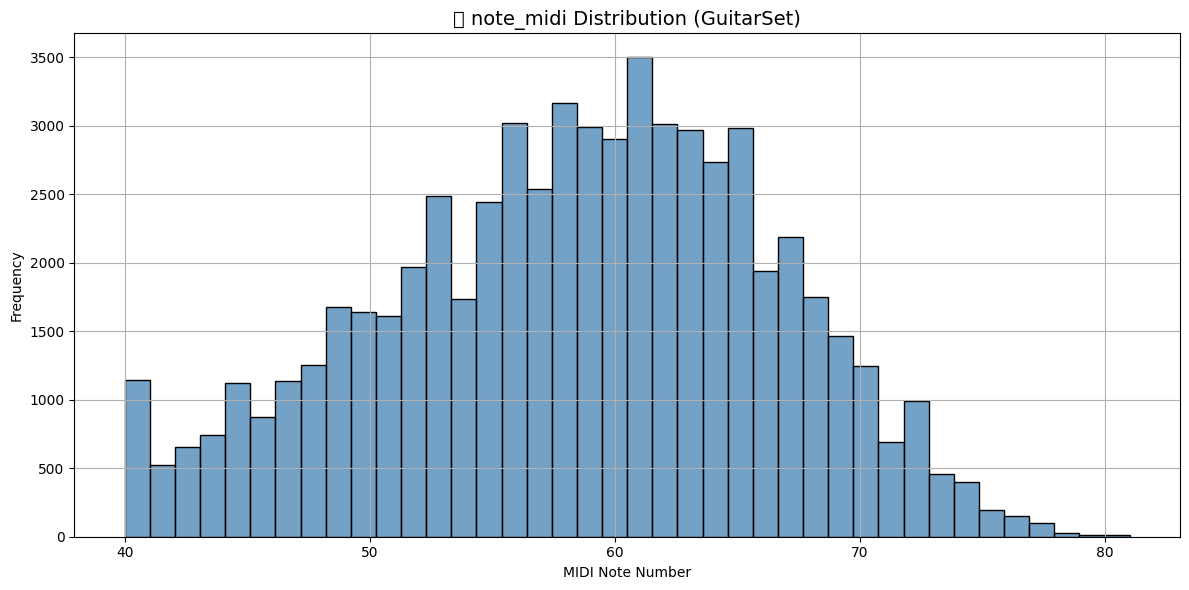

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

jams_dir = "/content/drive/MyDrive/Automatic Guitar Transcription/Data Set/GuitarSet/annotation"

all_note_midi = []

for fname in sorted(os.listdir(jams_dir)):
    if fname.endswith(".jams"):
        jam_path = os.path.join(jams_dir, fname)
        jam = jams.load(jam_path)

        for ann in jam.annotations:
            if ann.namespace == "note_midi":
                for note in ann.data:
                    all_note_midi.append(round(note.value))

plt.figure(figsize=(12, 6))
sns.histplot(all_note_midi, bins=40, kde=False, color='steelblue')
plt.title("🎼 note_midi Distribution (GuitarSet)", fontsize=14)
plt.xlabel("MIDI Note Number")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-16-07f8fcd074a1>:25: UserWarning: Glyph 127928 (\N{GUITAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127928 (\N{GUITAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


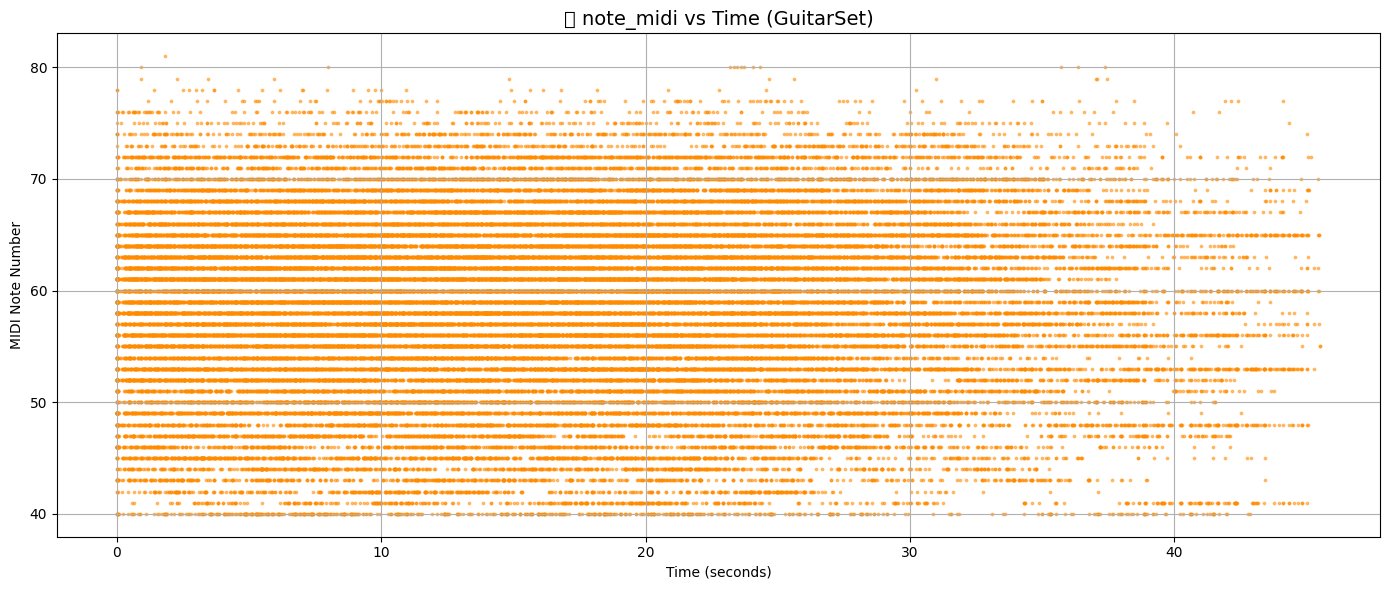

In [ ]:
import matplotlib.pyplot as plt

# Tüm notaların zaman ve midi bilgilerini topla
note_times = []
note_pitches = []

for fname in sorted(os.listdir(jams_dir)):
    if fname.endswith(".jams"):
        jam_path = os.path.join(jams_dir, fname)
        jam = jams.load(jam_path)

        for ann in jam.annotations:
            if ann.namespace == "note_midi":
                for note in ann.data:
                    note_times.append(note.time)
                    note_pitches.append(round(note.value))

plt.figure(figsize=(14, 6))
plt.scatter(note_times, note_pitches, s=3, alpha=0.5, color='darkorange')
plt.title("🎸 note_midi vs Time (GuitarSet)", fontsize=14)
plt.xlabel("Time (seconds)")
plt.ylabel("MIDI Note Number")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-17-77c99ea58860>:50: UserWarning: Glyph 127928 (\N{GUITAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


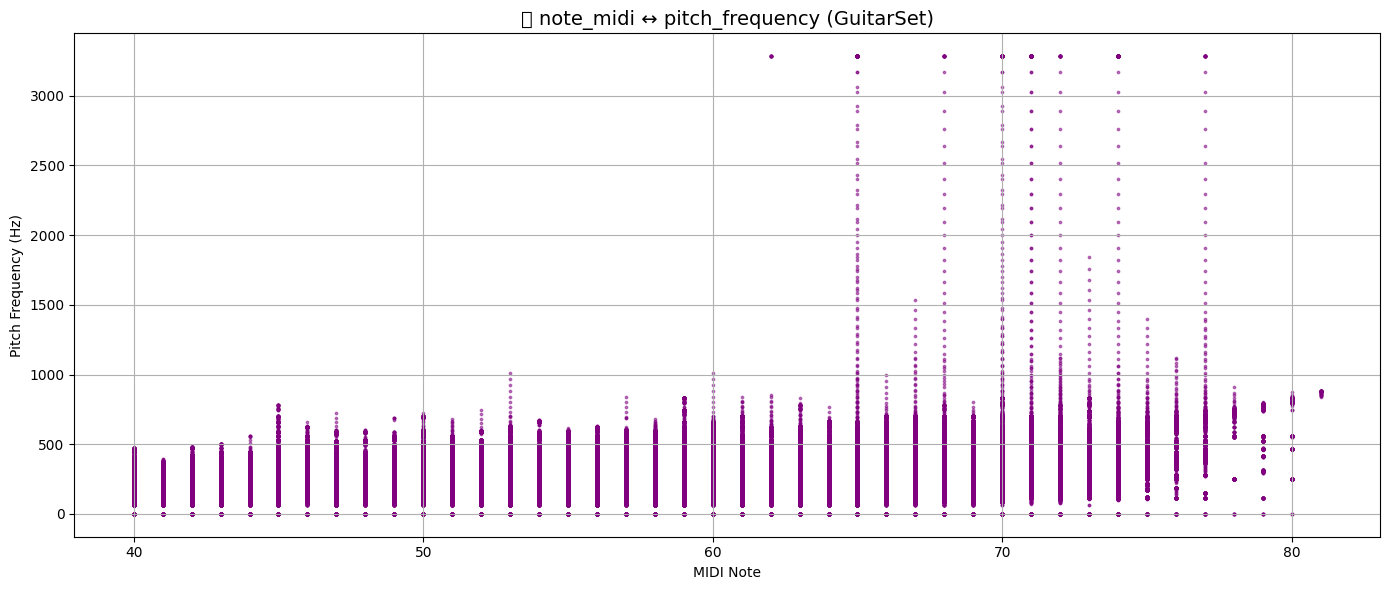

In [ ]:
import os
import jams
import matplotlib.pyplot as plt
from collections import defaultdict

jams_dir = "/content/drive/MyDrive/Automatic Guitar Transcription/Data Set/GuitarSet/annotation"

# note_midi ↔ pitch_frequency eşleşmeleri
midi_to_freqs = defaultdict(list)

for fname in sorted(os.listdir(jams_dir)):
    if fname.endswith(".jams"):
        jam_path = os.path.join(jams_dir, fname)
        jam = jams.load(jam_path)

        note_events = []
        pitch_events = []

        for ann in jam.annotations:
            if ann.namespace == "note_midi":
                for note in ann.data:
                    note_events.append((note.time, note.time + note.duration, round(note.value)))
            elif ann.namespace == "pitch_contour":
                for pitch in ann.data:
                    if pitch.value["voiced"]:
                        pitch_events.append((pitch.time, pitch.value["frequency"]))

        for note_start, note_end, midi in note_events:
            for pitch_time, freq in pitch_events:
                if note_start <= pitch_time <= note_end:
                    midi_to_freqs[midi].append(freq)

plot_midi = []
plot_freq = []

for midi, freqs in midi_to_freqs.items():
    for f in freqs:
        plot_midi.append(midi)
        plot_freq.append(f)

plt.figure(figsize=(14, 6))
plt.scatter(plot_midi, plot_freq, s=3, alpha=0.5, color='purple')
plt.title("🎸 note_midi ↔ pitch_frequency (GuitarSet)", fontsize=14)
plt.xlabel("MIDI Note")
plt.ylabel("Pitch Frequency (Hz)")
plt.grid(True)
plt.tight_layout()
plt.show()

### **pitch_contour lenghts**

<ipython-input-18-5a636a619e6c>:41: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


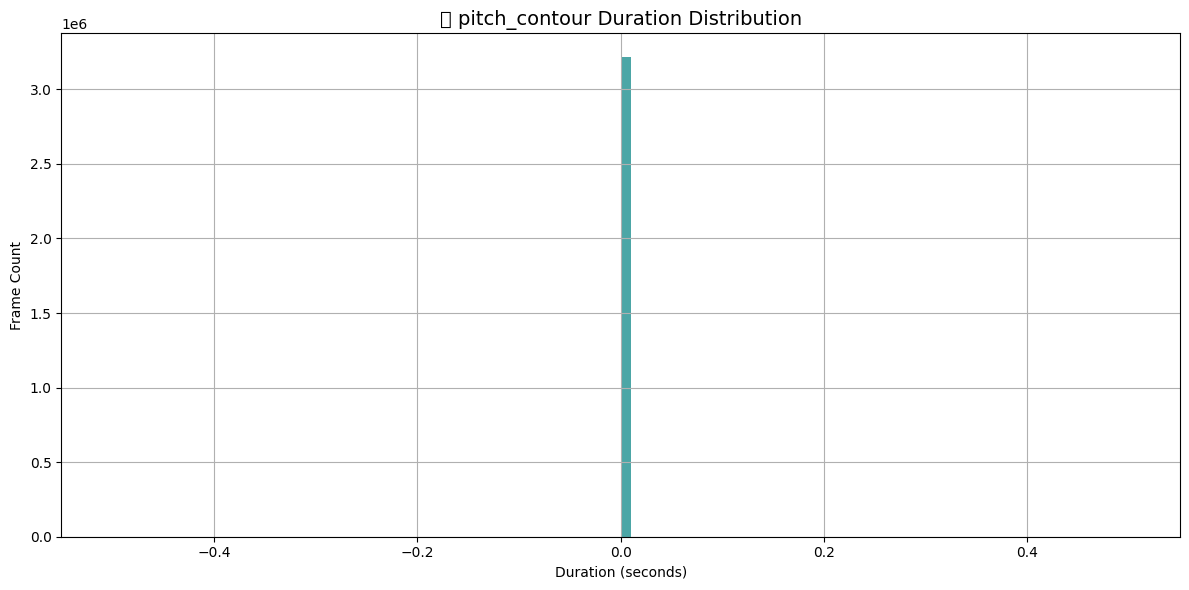

📈 pitch_contour duration statistics:
min_duration: 0.0
max_duration: 0.0
mean_duration: 0.0
median_duration: 0.0
std_duration: 0.0
num_frames: 3214786
num_zero_or_negative: 3214786


In [ ]:
import os
import jams
import numpy as np
import matplotlib.pyplot as plt

# 🎯 .jams klasörünü tanımla
jams_dir = "/content/drive/MyDrive/Automatic Guitar Transcription/Data Set/GuitarSet/annotation"

# pitch_contour duration listesi
pitch_durations = []

for fname in sorted(os.listdir(jams_dir)):
    if fname.endswith(".jams"):
        jam_path = os.path.join(jams_dir, fname)
        jam = jams.load(jam_path)

        for ann in jam.annotations:
            if ann.namespace == "pitch_contour":
                for pitch in ann.data:
                    pitch_durations.append(pitch.duration)

# 🧮 İstatistikler
durations_np = np.array(pitch_durations)
duration_stats = {
    "min_duration": round(np.min(durations_np), 6),
    "max_duration": round(np.max(durations_np), 6),
    "mean_duration": round(np.mean(durations_np), 6),
    "median_duration": round(np.median(durations_np), 6),
    "std_duration": round(np.std(durations_np), 6),
    "num_frames": len(durations_np),
    "num_zero_or_negative": int(np.sum(durations_np <= 0))
}

# 📊 Histogram
plt.figure(figsize=(12, 6))
plt.hist(durations_np, bins=100, color='teal', alpha=0.7)
plt.title("⏱️ pitch_contour Duration Distribution", fontsize=14)
plt.xlabel("Duration (seconds)")
plt.ylabel("Frame Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧾 Özet çıktı
print("📈 pitch_contour duration statistics:")
for k, v in duration_stats.items():
    print(f"{k}: {v}")


<ipython-input-19-9854e675d4b9>:39: UserWarning: Glyph 127898 (\N{LEVEL SLIDER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127898 (\N{LEVEL SLIDER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


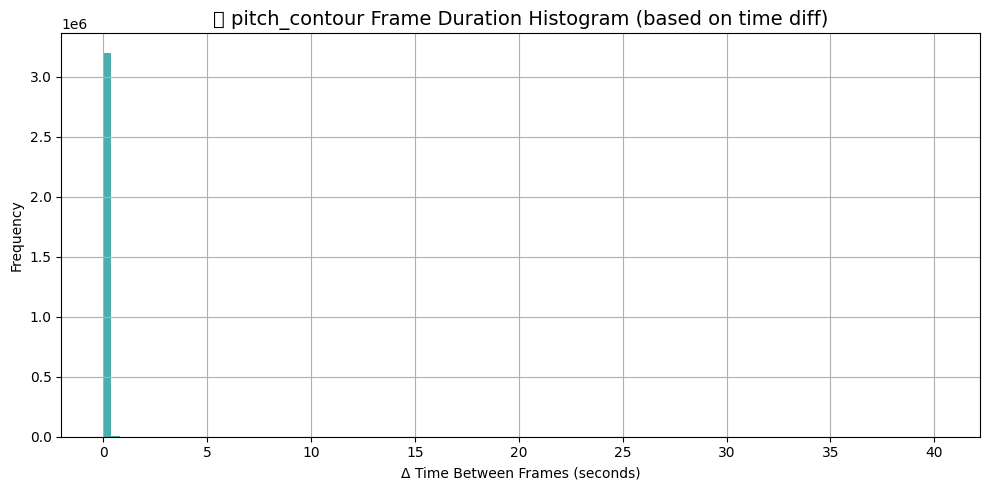

📈 Frame süresi istatistikleri:
min_delta: 2.3e-05
max_delta: 40.184127
mean_delta: 0.013278
median_delta: 0.005805
std_delta: 0.181542
num_deltas: 3212980


In [ ]:
import os
import jams
import numpy as np
import matplotlib.pyplot as plt

jams_dir = "/content/drive/MyDrive/Automatic Guitar Transcription/Data Set/GuitarSet/annotation"

# 🎯 Zaman farklarını topla
all_frame_deltas = []

for fname in sorted(os.listdir(jams_dir)):
    if fname.endswith(".jams"):
        jam_path = os.path.join(jams_dir, fname)
        jam = jams.load(jam_path)

        for ann in jam.annotations:
            if ann.namespace == "pitch_contour":
                times = [frame.time for frame in ann.data]
                if len(times) >= 2:
                    deltas = np.diff(sorted(times))
                    all_frame_deltas.extend(deltas)

frame_deltas_np = np.array(all_frame_deltas)
frame_stats = {
    "min_delta": round(np.min(frame_deltas_np), 6),
    "max_delta": round(np.max(frame_deltas_np), 6),
    "mean_delta": round(np.mean(frame_deltas_np), 6),
    "median_delta": round(np.median(frame_deltas_np), 6),
    "std_delta": round(np.std(frame_deltas_np), 6),
    "num_deltas": len(frame_deltas_np)
}

plt.figure(figsize=(10, 5))
plt.hist(frame_deltas_np, bins=100, color='darkcyan', alpha=0.7)
plt.title("🎚️ pitch_contour Frame Duration Histogram (based on time diff)", fontsize=14)
plt.xlabel("Δ Time Between Frames (seconds)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

print("📈 Frame süresi istatistikleri:")
for k, v in frame_stats.items():
    print(f"{k}: {v}")

### **note_midi ↔ pitch_contour Matches**

<ipython-input-21-19ff3e904588>:63: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


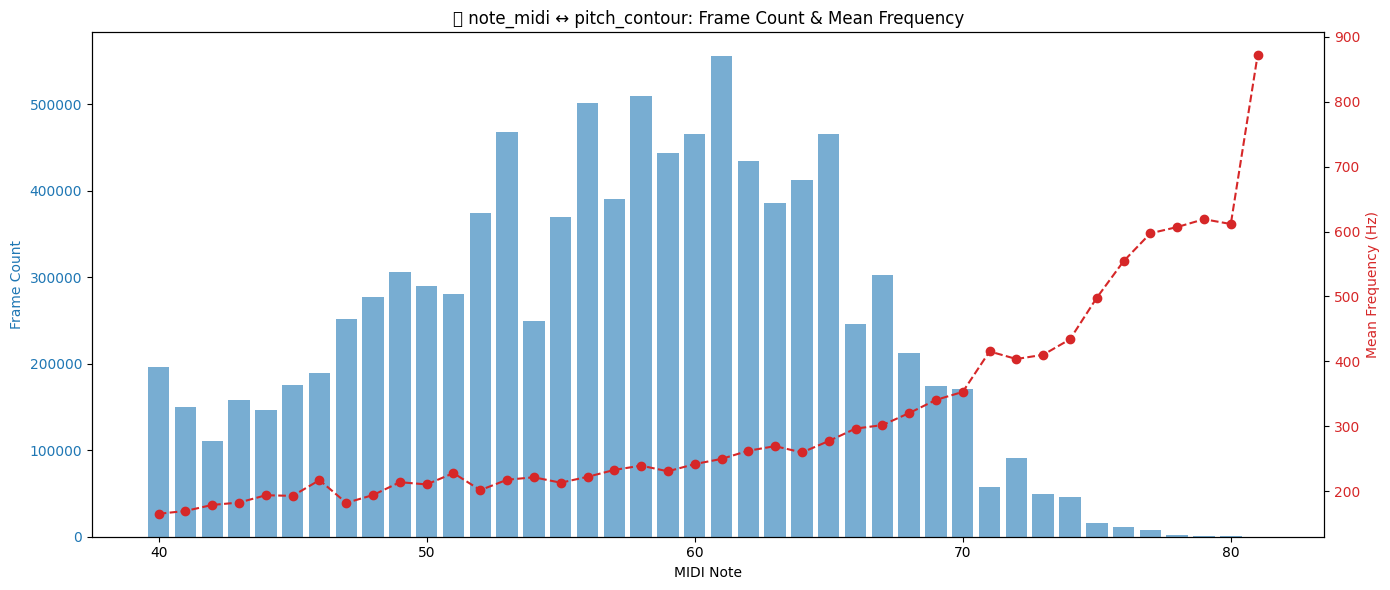

   note_midi  frame_count  mean_freq  std_freq
0         40       196131     165.35     81.14
1         41       149386     169.71     75.98
2         42       110924     179.01     80.87
3         43       158215     182.67     86.22
4         44       146693     193.91     88.46
5         45       175799     192.95     89.72
6         46       189368     217.20    101.54
7         47       252121     182.19     85.13
8         48       276943     194.21     86.80
9         49       305730     214.02     89.12


In [ ]:
import os
import jams
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

jams_dir = "/content/drive/MyDrive/Automatic Guitar Transcription/Data Set/GuitarSet/annotation"

midi_to_freqs = defaultdict(list)

for fname in sorted(os.listdir(jams_dir)):
    if fname.endswith(".jams"):
        jam_path = os.path.join(jams_dir, fname)
        jam = jams.load(jam_path)

        note_events = []
        pitch_events = []

        for ann in jam.annotations:
            if ann.namespace == "note_midi":
                for note in ann.data:
                    note_events.append((note.time, note.time + note.duration, round(note.value)))
            elif ann.namespace == "pitch_contour":
                for pitch in ann.data:
                    if pitch.value["voiced"]:
                        pitch_events.append((pitch.time, pitch.value["frequency"]))

        for note_start, note_end, midi in note_events:
            for pitch_time, freq in pitch_events:
                if note_start <= pitch_time <= note_end:
                    midi_to_freqs[midi].append(freq)

# 📊 Ortalama frekans ve frame sayısı
midi_summary = []

for midi, freqs in sorted(midi_to_freqs.items()):
    if len(freqs) > 0:
        midi_summary.append({
            "note_midi": midi,
            "frame_count": len(freqs),
            "mean_freq": round(np.mean(freqs), 2),
            "std_freq": round(np.std(freqs), 2)
        })

midi_df = pd.DataFrame(midi_summary)

fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:blue'
ax1.set_xlabel('MIDI Note')
ax1.set_ylabel('Frame Count', color=color)
ax1.bar(midi_df['note_midi'], midi_df['frame_count'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mean Frequency (Hz)', color=color)
ax2.plot(midi_df['note_midi'], midi_df['mean_freq'], color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("🎯 note_midi ↔ pitch_contour: Frame Count & Mean Frequency")
fig.tight_layout()
plt.show()

print(midi_df.head(10))

### **Same note behavior in different .jams files**

In [13]:
import os
import jams
import numpy as np
import pandas as pd
from collections import defaultdict

# 🎯 Hedef nota
target_midi = 62
jams_dir = "/content/drive/MyDrive/Automatic Guitar Transcription/Data Set/GuitarSet/annotation"

file_freq_summary = []

for fname in sorted(os.listdir(jams_dir)):
    if fname.endswith(".jams"):
        jam_path = os.path.join(jams_dir, fname)
        jam = jams.load(jam_path)

        note_events = []
        pitch_events = []

        for ann in jam.annotations:
            if ann.namespace == "note_midi":
                for note in ann.data:
                    if round(note.value) == target_midi:
                        note_events.append((note.time, note.time + note.duration))
            elif ann.namespace == "pitch_contour":
                for pitch in ann.data:
                    if pitch.value["voiced"]:
                        pitch_events.append((pitch.time, pitch.value["frequency"]))

        matched_freqs = []
        for note_start, note_end in note_events:
            for pitch_time, freq in pitch_events:
                if note_start <= pitch_time <= note_end:
                    matched_freqs.append(freq)

        if matched_freqs:
            file_freq_summary.append({
                "filename": fname,
                "frame_count": len(matched_freqs),
                "mean_freq": round(np.mean(matched_freqs), 2),
                "std_freq": round(np.std(matched_freqs), 2),
                "min_freq": round(np.min(matched_freqs), 2),
                "max_freq": round(np.max(matched_freqs), 2)
            })

df = pd.DataFrame(file_freq_summary)
df = df.sort_values("mean_freq")

print(df.head(10))

                      filename  frame_count  mean_freq  std_freq  min_freq  \
37       00_SS3-98-C_comp.jams          216     168.73     75.04     95.97   
191   04_Rock3-148-C_comp.jams          390     170.17     73.07      0.00   
97    02_Jazz3-150-C_comp.jams         2606     172.04     70.26      0.00   
110      02_SS3-98-C_comp.jams         1581     172.61     80.10      0.00   
104   02_Rock3-148-C_comp.jams         2955     172.71     70.10      0.00   
94   02_Jazz2-110-Bb_comp.jams          147     182.34     85.76     80.28   
4      00_BN2-166-Ab_comp.jams          188     195.59     75.20    103.05   
107      02_SS1-68-E_comp.jams          202     196.31     85.66    110.25   
86   02_Funk2-108-Eb_comp.jams          223     203.13     63.73    117.33   
65    01_Rock1-130-A_comp.jams         1495     203.28     69.77     83.10   

     max_freq  
37     301.04  
191    330.36  
97     315.17  
110    354.57  
104    311.30  
94     297.15  
4      314.98  
107    314.74

<ipython-input-27-1e8a7b60ea4c>:22: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


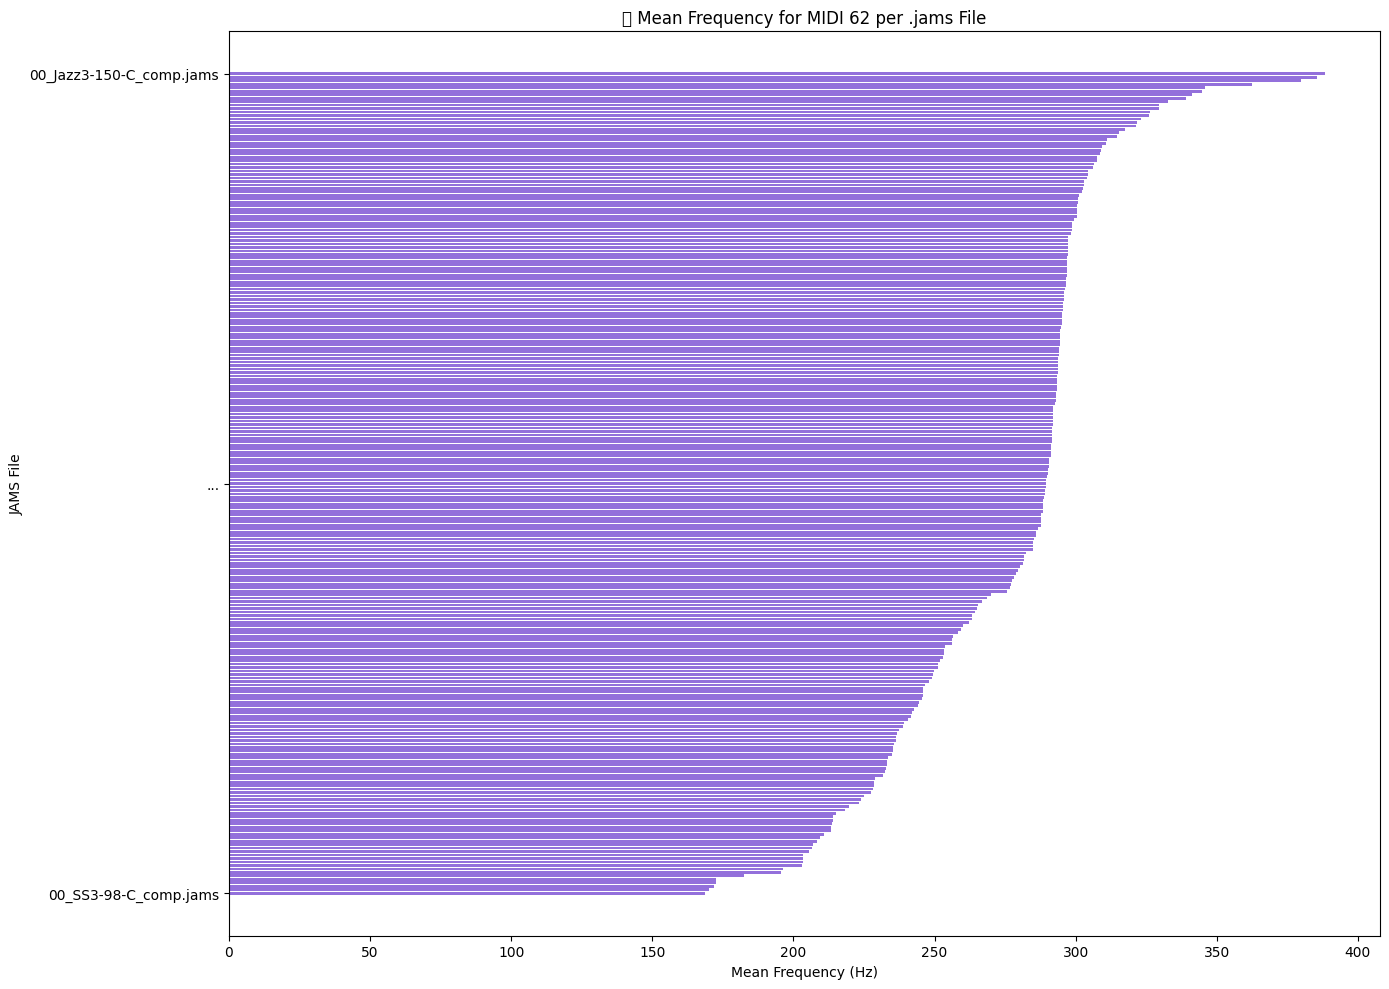

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Sırala ve indeksle
df_sorted = df.sort_values("mean_freq").reset_index(drop=True)

plt.figure(figsize=(14, 10))
plt.barh(df_sorted.index, df_sorted['mean_freq'], color='mediumpurple')
plt.xlabel("Mean Frequency (Hz)")
plt.ylabel("JAMS File")
plt.title("🎯 Mean Frequency for MIDI 62 per .jams File")

# Y ekseni etiketlerini özelleştir
yticks_pos = [0, len(df_sorted) // 2, len(df_sorted) - 1]
yticks_labels = [
    df_sorted.loc[0, 'filename'],
    "...",
    df_sorted.loc[len(df_sorted) - 1, 'filename']
]
plt.yticks(ticks=yticks_pos, labels=yticks_labels)

plt.tight_layout()
plt.show()


<ipython-input-20-725387d3219a>:9: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


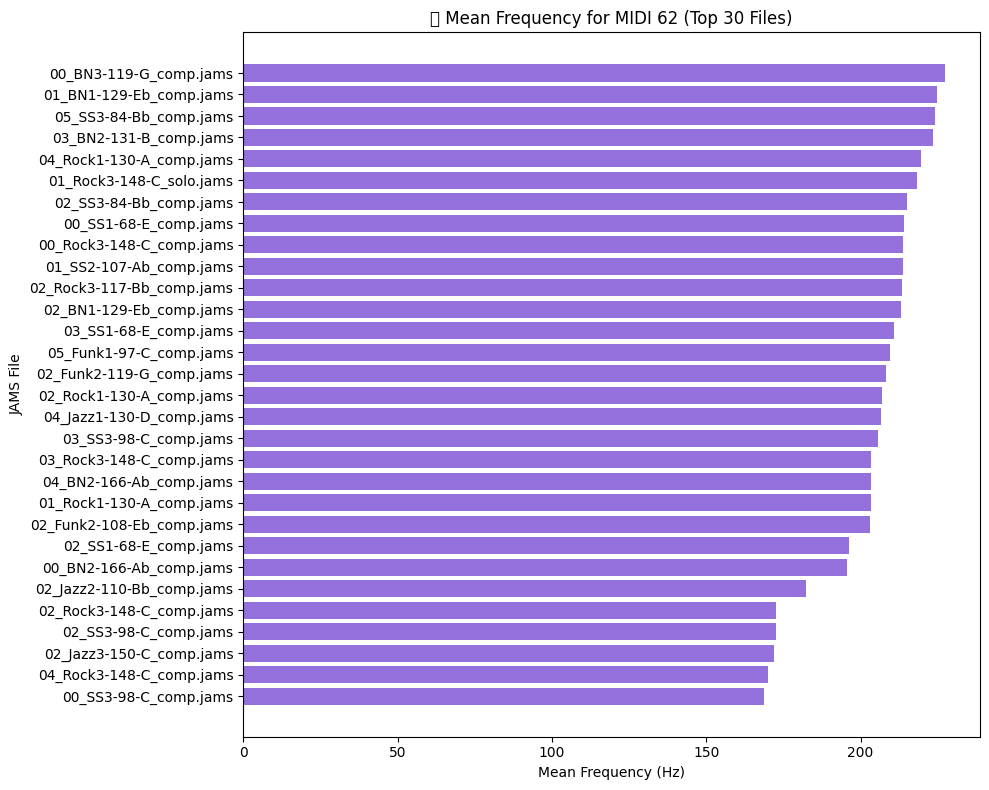

In [20]:
top_n = 30
subset = df.sort_values("mean_freq").head(top_n)

plt.figure(figsize=(10, 8))
plt.barh(subset['filename'], subset['mean_freq'], color='mediumpurple')
plt.xlabel("Mean Frequency (Hz)")
plt.ylabel("JAMS File")
plt.title(f"🎯 Mean Frequency for MIDI {target_midi} (Top {top_n} Files)")
plt.tight_layout()
plt.show()

<ipython-input-17-591e915f9c28>:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


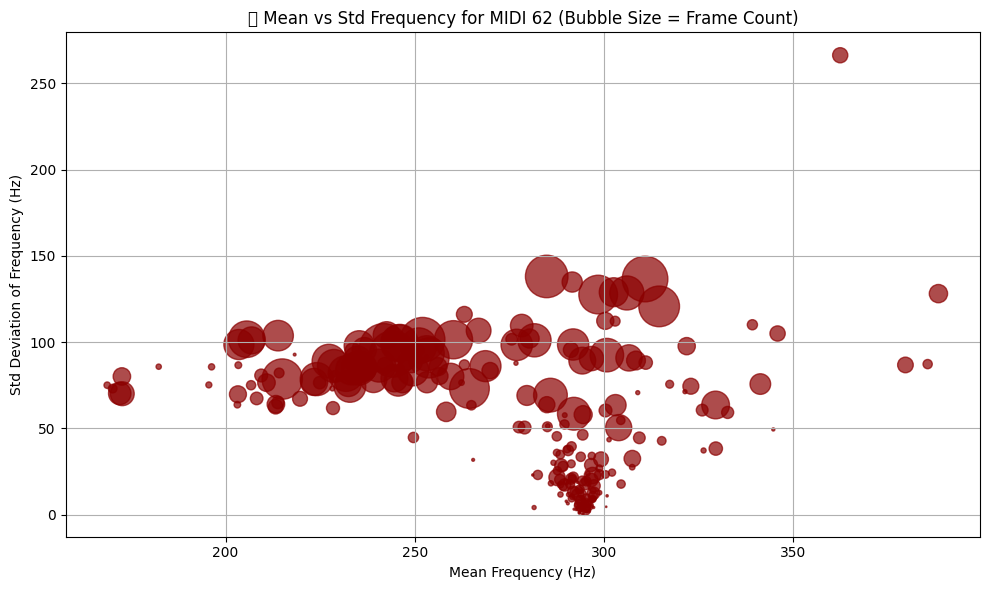

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['mean_freq'], df['std_freq'], s=df['frame_count'] / 10, alpha=0.7, color='darkred')
plt.xlabel("Mean Frequency (Hz)")
plt.ylabel("Std Deviation of Frequency (Hz)")
plt.title("📈 Mean vs Std Frequency for MIDI 62 (Bubble Size = Frame Count)")
plt.grid(True)
plt.tight_layout()
plt.show()


### **note_midi Timings**

<ipython-input-14-a2cbcc3f3ed8>:21: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


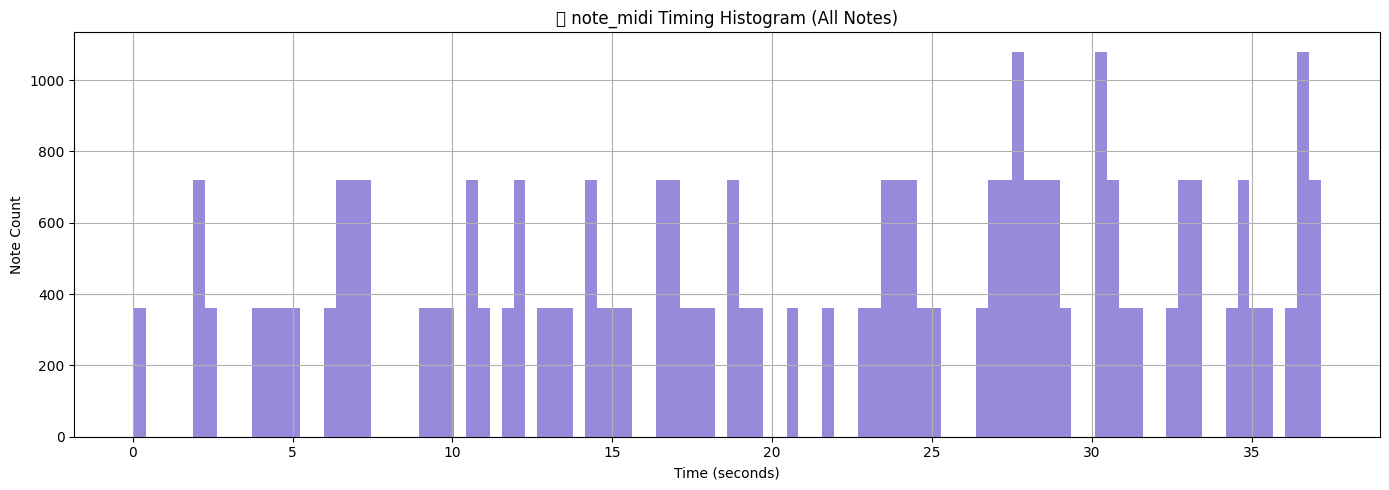

In [14]:
import matplotlib.pyplot as plt

# 🎯 Tüm note_midi başlangıç zamanlarını topla
note_start_times = []

for fname in sorted(os.listdir(jams_dir)):
    if fname.endswith(".jams"):

        for ann in jam.annotations:
            if ann.namespace == "note_midi":
                for note in ann.data:
                    note_start_times.append(note.time)

# ⏱️ Histogram çiz (zaman ekseninde yoğunluk)
plt.figure(figsize=(14, 5))
plt.hist(note_start_times, bins=100, color="slateblue", alpha=0.7)
plt.title("🎼 note_midi Timing Histogram (All Notes)")
plt.xlabel("Time (seconds)")
plt.ylabel("Note Count")
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
total_notes = 0
matched_notes = 0

for fname in sorted(os.listdir(jams_dir)):
    if fname.endswith(".jams"):

        note_events = []
        pitch_times = set()

        for ann in jam.annotations:
            if ann.namespace == "note_midi":
                for note in ann.data:
                    note_events.append((note.time, note.time + note.duration))
            elif ann.namespace == "pitch_contour":
                for pitch in ann.data:
                    if pitch.value["voiced"]:
                        pitch_times.add(round(pitch.time, 4))  # 4 digit round to avoid float mismatch

        for start, end in note_events:
            total_notes += 1
            # Notanın süresince en az 1 pitch frame varsa matched say
            for t in pitch_times:
                if start <= t <= end:
                    matched_notes += 1
                    break

coverage = round((matched_notes / total_notes) * 100, 2)
print(f"🎯 Coverage: {matched_notes}/{total_notes} notes matched → {coverage}% pitch coverage")


🎯 Coverage: 33480/33480 notes matched → 100.0% pitch coverage
